In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("USArrests.csv")

In [35]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
# 데이터로 거리를 구하고 최단, 최장, 평균연결법을 실시해보아라
# 데이터의 특성을 보고 어떤 도시로 묶이는지 실습

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [38]:
# 컬럼명 바꾸기
df = df.rename(columns={'Unnamed: 0':'State'})

In [39]:
labelsList = df["State"].tolist()
# labelsList

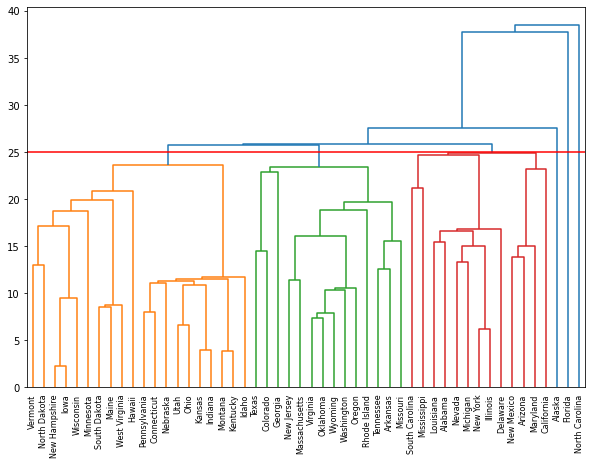

In [40]:
# 최단 연결법
# 이때 None 값이 없어야함
# 연속형 변수가 들어가야함
single = linkage(df.iloc[:,1:], metric = "euclidean", method = "single")

# 덴드로그램 그리기

plt.figure(figsize = (10,7))

dendrogram(single, orientation = "top", labels = labelsList, distance_sort = "descending", show_leaf_counts = True,color_threshold = 25)
plt.axhline(y = 25, color = "r")
plt.show()

fcluster

In [41]:

assignments = fcluster(single, 25, "distance")
assignments

array([1, 4, 1, 2, 1, 2, 3, 1, 5, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 6, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [42]:
df["label"] = assignments

In [43]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,label
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


ward 연결법으로 다시 시행

In [44]:
df = pd.read_csv("USArrests.csv")

In [45]:
df = df.rename(columns = {"Unnamed: 0" : "State"})

In [46]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [47]:
# StateList 생성

StateList = df["State"].tolist()
# StateList

In [48]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import matplotlib.pyplot as plt

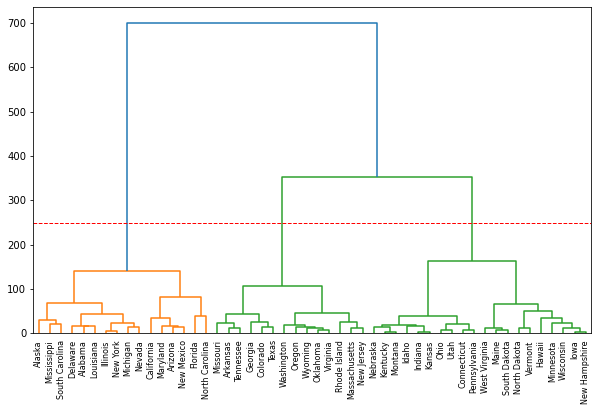

In [49]:
ward = linkage(df.iloc[:,1:], method = "ward",metric = "euclidean",)

plt.figure(figsize = (10,6))
dendrogram(ward,labels = StateList)
plt.axhline(y = 250, lw = 1, color = "r", ls = "--")
plt.show()

In [50]:
# 값 할당

label = fcluster(ward, 250, "distance")

df["cluster"] = label

In [51]:
df.groupby("cluster").mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


1번은 고위험 지역
2번은 1번 보단 아니지만 범죄가 어느정도 일어나는 지역
3번은 살기좋은 지역

### 비계층척 군집분석

In [52]:
import pandas as pd
from sklearn.cluster import KMeans

In [53]:
df = pd.read_csv("iris.csv")

In [54]:
df.drop("variety", axis = 1, inplace = True)

In [55]:
km = KMeans(n_clusters = 2, random_state = 1)
km.fit(df)

KMeans(n_clusters=2, random_state=1)

In [56]:
df["cluster"] = km.labels_

In [57]:
# 군집분석 평가척도 : 콜린스키 하라비츠
# 클러스터내의 분산은 적게 클러스터간 분산은 커야좋음
# 밀도기반 클러스터에서 점수가 더 높게 나타나는 경향이 있음
from sklearn.metrics import calinski_harabasz_score

In [58]:
calinski_harabasz_score(df, km.labels_)

547.2197316045134

In [59]:
# for문을 이용해서 가장 적합한 클러스터 수를 찾기
cnt = 1
for i in range(2,10):
    cnt += 1
    print("n_cluster 가 {} 일때 ".format(cnt))
    km = KMeans(n_clusters = i, random_state = 1)
    km.fit(df)
    labels = km.labels_
    score = calinski_harabasz_score(df, labels)
    print(np.round(score,2))
    print("------")
    

n_cluster 가 2 일때 
547.22
------
n_cluster 가 3 일때 
570.27
------
n_cluster 가 4 일때 
532.44
------
n_cluster 가 5 일때 
491.56
------
n_cluster 가 6 일때 
465.69
------
n_cluster 가 7 일때 
452.32
------
n_cluster 가 8 일때 
446.41
------
n_cluster 가 9 일때 
420.83
------


엘보우 기법을 이용

In [69]:
import matplotlib.pyplot as plt

def elbow(X):
    sse = []
    
    for i in range(1,11):
        km = KMeans(n_clusters= i, random_state = 1)
        km.fit(X)
        sse.append(km.inertia_) # sse 값을 리스트에 담음
        
        if i == 1:
            print("sse 가 1일때",sse)
        
    plt.plot(range(1,11), sse, marker = "o")
    plt.show()
     

sse 가 1일때 [715.6439333333334]


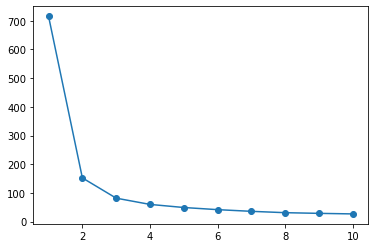

In [70]:
elbow(df) #기울기 소실이 급격한 지점이 2에서 3사이 이고
# 기울기 소실이 발생하지 않는 지점이 3부터 이므로 n_cluster = 3 일떄 가장 적합함

## 밀도 기반 군집분석

In [73]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [74]:
df.drop("variety", axis = 1, inplace = True)

In [79]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5, min_samples = 5).fit(df)
dbscan

DBSCAN()

In [83]:
labels = dbscan.labels_
df["db_cluster"] = labels

In [84]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,db_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


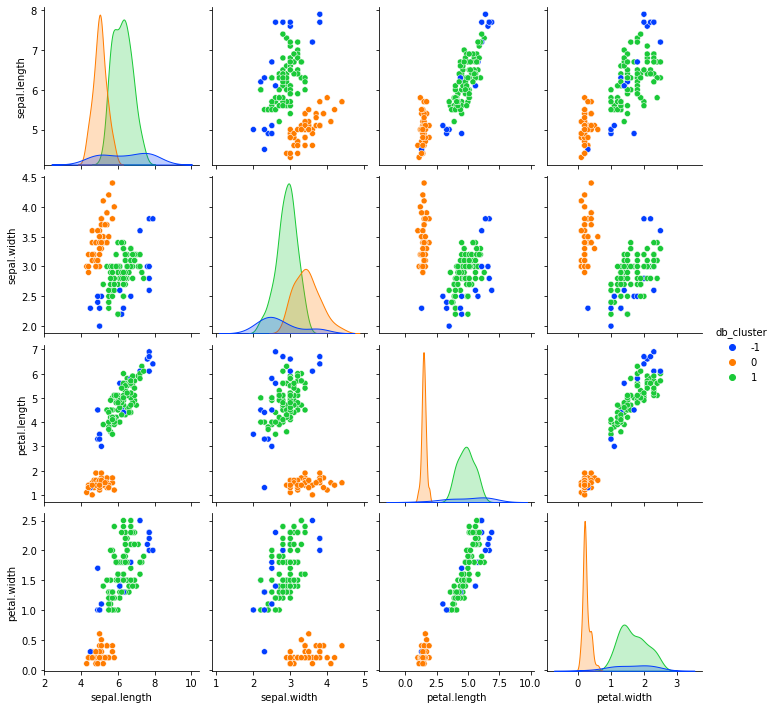

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue = "db_cluster", palette = "bright", diag_kind = "kde")
plt.show()